In [1]:
using Revise
using SSMCMain, SSMCMain.ModifiedMiCRM, SSMCMain.SpaceMMiCRM

In [2]:
using CairoMakie, ProgressLogging
using Base.Threads
using BenchmarkTools
using JLD2, Geppetto
using Random, Distributions, Statistics

In [3]:
using GLMakie
CairoMakie.activate!()

# Basic dilution with a defined community

In [5]:
function random_matrix_initialization(S, M, c_sparsity=1.0, l_sparsity=0.35)
    # 110425 to start let us just randomly draw D and c without structure
    # similarly, we will generate some random guesses for the other parameters

    # constant dilution rate
    rnd = rand()
    r = fill(rnd,M)

    # universal death rate
    rnd2 = rand()
    m = rnd2

    # for simplicity, lets start with a single fed resource
    # chemostat feed rate 
    #K = fill(0.,M)
    #K[1] = 1.

    # lets allow resources some variability
    #K_dist = truncated(Normal(0.5,0.1), 0.0, 1.0)
    K_dist = Beta(0.1,0.3)
    K = rand(K_dist, M)


    # leakage now. Lets assume its a pretty flat probability distribution
    leak = Beta(0.2/l_sparsity,0.2)
    l = rand(leak,(S,M))

    # most values around 0. This is essentially a proxy for sparsity
    c_i_alpha = Beta(0.5/c_sparsity,0.5)
    c = rand(c_i_alpha,(S,M))
    
    # finally, the most complicated distribution
    D = fill(0.,(S,M,M))
    for i in 1:S
        for j in 1:M
            if c[i,j] > 0
                flag = true
                while flag
                    for k in 1:M
                        if j == k
                            D[i,k,j] = 0.0
                        else
                            D[i,k,j] = rand(Beta(0.5/(M/5),0.5))
                        end
                    end
                    # check if the sum of the row is less than 1
                    if sum(D[i,:,j]) < 1.0
                        flag = false
                    end
                end
            end

        end
    end


    Ds = fill(0.,(S+M))
    Ds[1:S] .= 1e-5
    Ds[1+S] = 100
    Ds[S+2:S+M] .= 10

    return r, m, K, l, c, D, Ds

   
    

end

random_matrix_initialization (generic function with 3 methods)

In [10]:
S = 10
M = 10
r, m, K, l, c, D, Ds = random_matrix_initialization(S,M)
K=0.
r=0.

0.0

┌ Info: strain 1 leaks less than it energetically can through consuming 1
└ @ SSMCMain.ModifiedMiCRM /Users/stevenredford/Dropbox/Python/SSMC/src/SSMCMain/src/ModifiedMiCRM/ModifiedMiCRM.jl:72
┌ Info: strain 1 leaks less than it energetically can through consuming 2
└ @ SSMCMain.ModifiedMiCRM /Users/stevenredford/Dropbox/Python/SSMC/src/SSMCMain/src/ModifiedMiCRM/ModifiedMiCRM.jl:72
┌ Info: strain 1 leaks less than it energetically can through consuming 3
└ @ SSMCMain.ModifiedMiCRM /Users/stevenredford/Dropbox/Python/SSMC/src/SSMCMain/src/ModifiedMiCRM/ModifiedMiCRM.jl:72
┌ Info: strain 1 leaks less than it energetically can through consuming 4
└ @ SSMCMain.ModifiedMiCRM /Users/stevenredford/Dropbox/Python/SSMC/src/SSMCMain/src/ModifiedMiCRM/ModifiedMiCRM.jl:72
┌ Info: strain 1 leaks less than it energetically can through consuming 5
└ @ SSMCMain.ModifiedMiCRM /Users/stevenredford/Dropbox/Python/SSMC/src/SSMCMain/src/ModifiedMiCRM/ModifiedMiCRM.jl:72
┌ Info: strain 1 leaks less than it

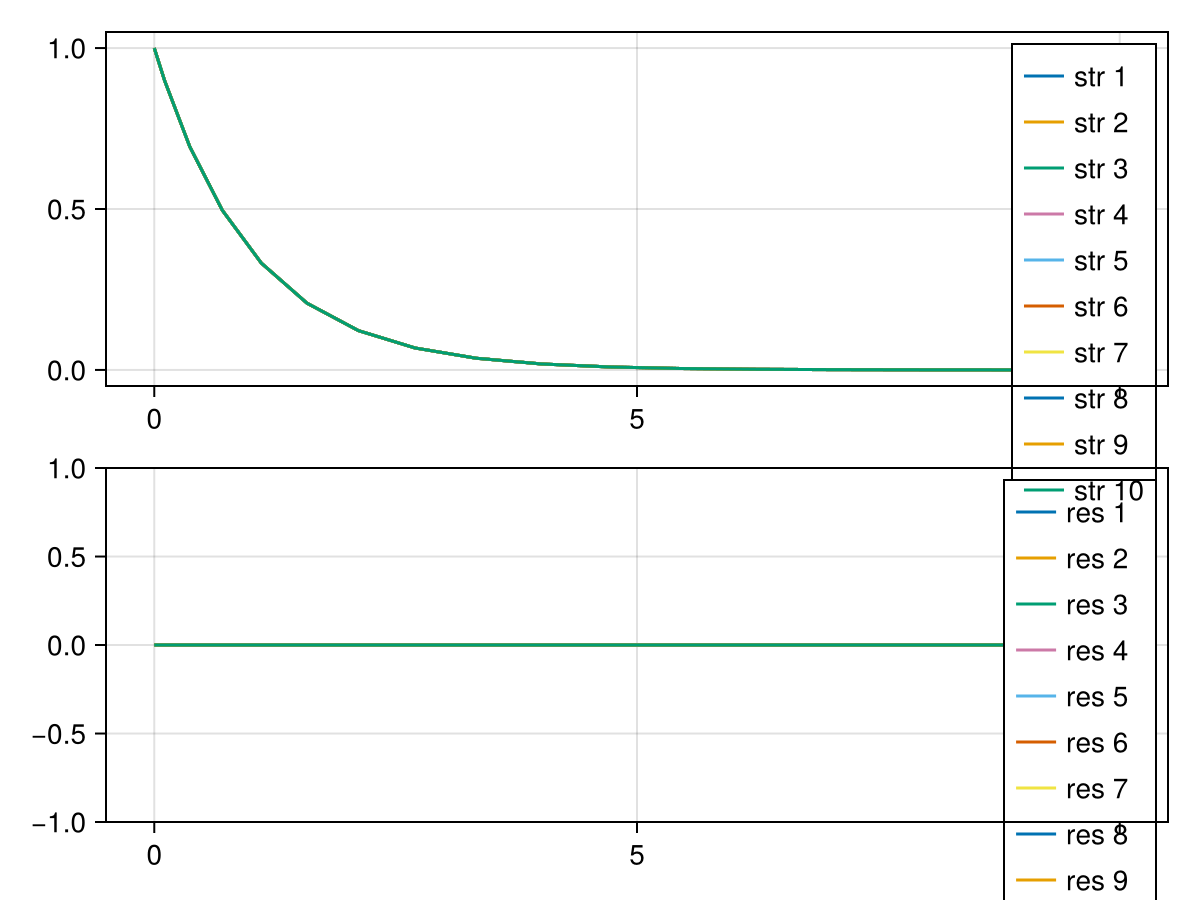

20-element Vector{Float64}:
 4.798040937939607e-5
 4.798040937939607e-5
 4.798040937939607e-5
 4.798040937939607e-5
 4.798040937939607e-5
 4.798040937939607e-5
 4.798040937939607e-5
 4.798040937939607e-5
 4.798040937939607e-5
 4.798040937939607e-5
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [12]:
tfinal = 10

p = make_mmicrm_smart(S, M, tfinal;
    D, c, l,
    K,r,m,
    u0=:onlyN,
    u0rand=0.
)

s = solve(p)
check_mmicrmparams(p.p)
display(plot_mmicrm_sol(s))
s[end]

In [17]:
println(p.p.u0)

ErrorException: type MMiCRMParams has no field u0

In [ ]:
function manually_integrate()